In [2]:
import pandas as pd

In [19]:
df = pd.read_excel('./kospi.xlsx', usecols=[0,1,2,3,4], index_col='Date')


In [16]:
df.head(1)

,Close,Open,High,Low
Date,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59


In [8]:
# 변동성 돌파전략

In [20]:
# 변동 파생변수

df['change'] = df['High'] - df['Low'] # 음수 나올 일 없음
df.head(1)

,Close,Open,High,Low,change
Date,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59


In [21]:
# 전일변동 파생변수

df['전일변동'] = df['change'].shift()
df.head() 

,Close,Open,High,Low,change,전일변동
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32


In [22]:
# 목표가 파생변수 

# 목표가 = 시가 + 전일변동 * 0.5

df['목표가'] = df['Open'] + df['전일변동'] * 0.5
df.head()

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330


In [26]:
_df = df.copy()

In [27]:
df = _df.copy()

1. 목표가보다 고가가 높으면 매수 
    - 당일 종가로 매도 가정
2. 수익률 -> 종가 - 목표가/ 목표가 + 1
3. 그 외의 수익률은 1


In [44]:
acc_rtn = 1

for i in df.index :
       

    if (df.loc[i, '목표가']) < (df.loc[i, 'High']) :
        rtn = (df.loc[i, 'Close'] - df.loc[i, '목표가'])/ df.loc[i,'목표가'] + 1
        df.loc[i, '수익률'] = rtn

    
    else : 
        rtn = 1
        df.loc[i, '수익률'] = rtn

    acc_rtn *= rtn
    df.loc[i, '누적수익률'] = acc_rtn

In [45]:
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률
Date,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280


In [42]:
df['수익률'].cumprod()

Date
2000-01-04    1.000000
2000-01-05    1.000000
2000-01-06    1.000000
2000-01-07    1.000000
2000-01-10    1.000000
                ...   
2021-08-23    5.237280
2021-08-24    5.237280
2021-08-25    5.237280
2021-08-26    5.237280
2021-08-27    5.234682
Name: 수익률, Length: 5349, dtype: float64

In [46]:
import numpy as np

In [47]:
# np.where(조건식, 참인경우 값, 거짓인 경우 값)
    # np.where() 조건을 만족하는 인덱스 찾기 
df['수익률2'] = np.where(df['High'] >= df['목표가'],
                      (df['Close']-df['목표가'])/df['목표가'] +1,
                      1)

In [50]:
(df['수익률'] == df['수익률2']).value_counts() 

True    5349
dtype: int64

In [52]:
# 누적수익률 : 누적곱 cumprod()

df['누적수익률2'] = df['수익률2'].cumprod()

In [53]:
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2
Date,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280


In [65]:
# CAGR : 연복리수익률

## 누적수익률 ** (1 / (투자기간/365)) - 1  <- '일(day)' 단위 
# 시계열데이터를 이용하여 기간 

delta = df.index[-1] - df.index[0]  # 시계열데이터 간 연산 가능
delta.days  # days 는 Timedelta의 속성


7906

In [59]:
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1]**(1/year) -1

print('CAGR : ', CAGR *100, '%')

CAGR :  7.941722848934241 %


In [75]:
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin' :
    plt.rc('font', family = 'AppleGothic')
else : 
    plt.rc('font', family = 'Malgun Gothic')

In [80]:
df['Close']/df['Close'].iloc[0]

Date
2000-01-04    1.000000
2000-01-05    0.931325
2000-01-06    0.907227
2000-01-07    0.895764
2000-01-10    0.932203
                ...   
2021-08-23    2.917935
2021-08-24    2.963344
2021-08-25    2.971380
2021-08-26    2.954119
2021-08-27    2.959189
Name: Close, Length: 5349, dtype: float64

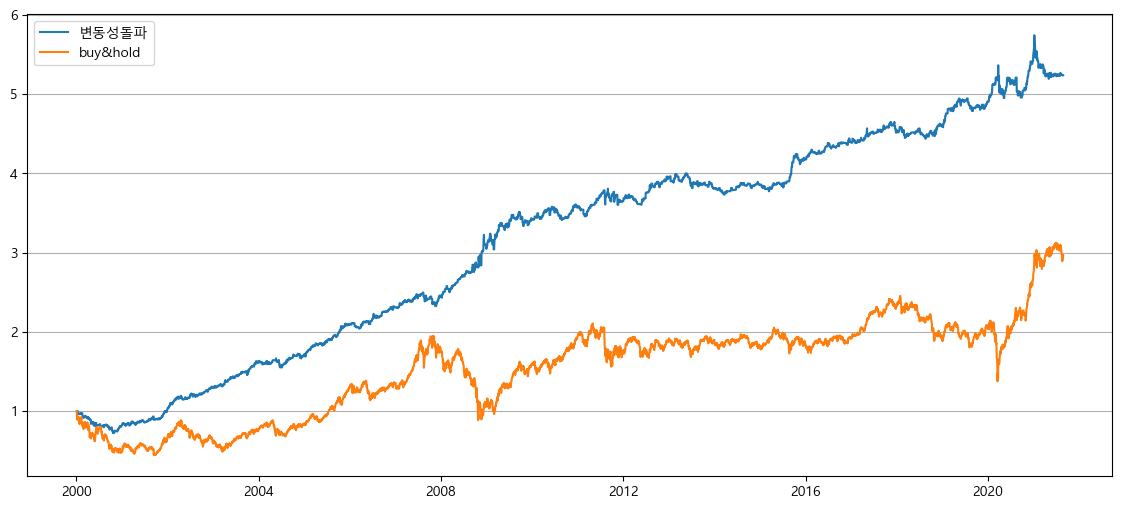

In [81]:
# 변동성돌파전략을 라인그래프 시각화
# buyandhold 전략으로 누적수익률 시각화
# 둘이 비교
# 바이앤홀드 의의 : 어떤 투자전략을 분석하기 전에 이렇게 바이앤홀드보다는 좋게 나와야 시작하는 그런 역할

plt.figure(figsize=(14,6))
plt.grid(True, axis = 'y')
plt.plot(df['누적수익률'], label = '변동성돌파')
plt.plot(df['Close']/df['Close'].iloc[0], label = 'buy&hold') # buy& hold
plt.legend()
plt.show()



In [83]:
# Draw Down(DD)  -> 하나의 매매신호 전고점대비 얼마나 떨어졌는지 : 낙폭
# MDD : Max DD -> 최대 낙폭
# DD = (1- 누적수익률/전고점)*100


df['전고점'] = df['누적수익률'].cummax()  # cummax() : 누적곱 +++++++++++++++++++++
df['DD'] = (1- df['누적수익률'] / df['전고점']) * 100

In [84]:
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,b&h,전고점,DD
Date,,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280,1.001101,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280,1.005962,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280,0.999581,5.739762,8.754419
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,1.000000,5.237280,0.992774,5.739762,8.754419
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,0.999504,5.234682,1.005651,5.739762,8.799672


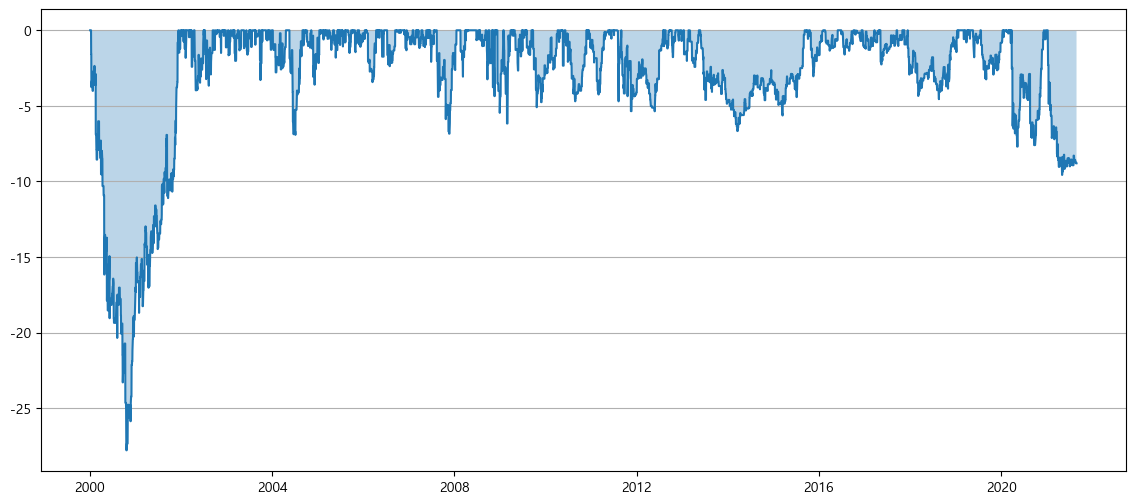

In [89]:
plt.rc('axes', unicode_minus = False) # 음수 깨짐 방지

plt.figure(figsize=(14,6))
plt.grid(True, axis = 'y')
plt.plot(-df['DD']) # 음수 붙여서 그래프
plt.fill_between(df.index, -df['DD'], alpha = .3)
plt.show()


In [91]:
print('MDD : ', df['DD'].max()) # DD는 크면 안좋음

MDD :  27.779726849588627


In [92]:
# 이동평균선 10일치 

df['MA10'] = df['Close'].rolling(10).mean() # rolling(n) 앞전 n개의 데이터 묶어주기
df.iloc[8:12]

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,b&h,전고점,DD,MA10
Date,,,,,,,,,,,,,,,
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386,0.977794,0.962386,0.988747,1.0,3.761404,NaN
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.004269,0.966495,1.021399,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.000000,0.966495,0.989136,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.000000,0.966495,0.968503,1.0,3.350535,963.568


In [93]:
# 전날의 이동평균선 보다 시가가 높으면 판매띠 (익절)
df['매매신호'] = df['Open'] > df['MA10'].shift(1)

In [95]:
df['매매신호'].value_counts()

True     3129
False    2220
Name: 매매신호, dtype: int64

In [96]:
# 수익률 계산방법 -> 매매신호가 1이고, 고가가 목표가보다 높은 경우

df['수익률2'] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']),
    df['Close']/df['목표가'],
    1
)


In [97]:
df['누적수익률2'] = df['수익률2'].cumprod()

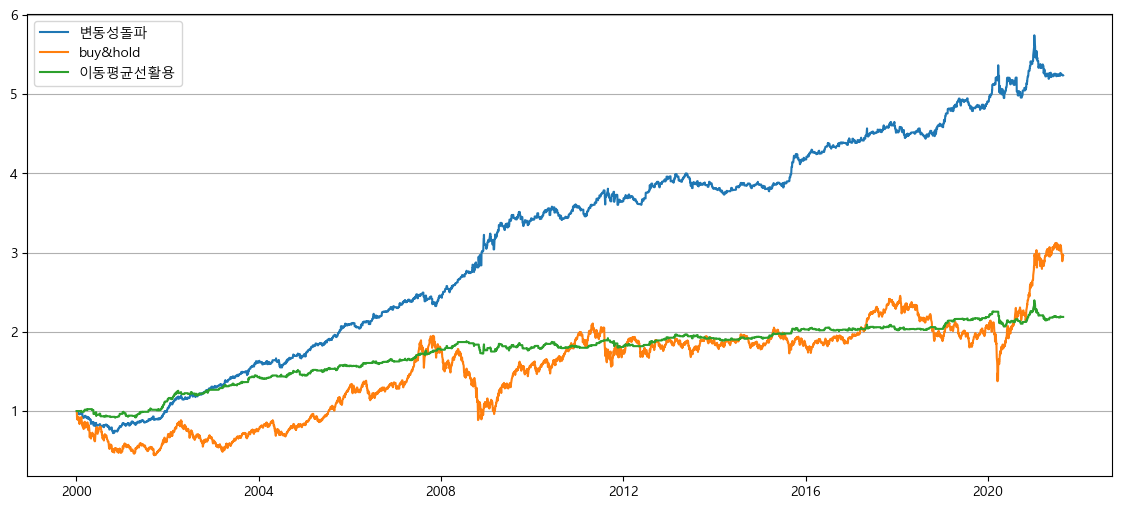

In [99]:
# 변동성돌파
# buyand hold
# 이동평균선
# 시각화 라인그래프

plt.figure(figsize=(14,6))
plt.grid(True, axis = 'y')
plt.plot(df['누적수익률'], label = '변동성돌파')
plt.plot(df['Close']/df['Close'].iloc[0], label = 'buy&hold') # buy& hold
plt.plot(df['누적수익률2'], label = '이동평균선활용')  # 이동평균선 MA10 이용한 매매신호를 활용한 전략
plt.legend()
plt.show()

In [103]:
# DD = (1- 누적수익률/전고점)*100


df['전고점2'] = df['누적수익률2'].cummax()  # cummax() : 누적곱 +++++++++++++++++++++
df['DD2'] = (1- df['누적수익률2'] / df['전고점2']) * 100

In [106]:
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,b&h,전고점,DD,MA10,매매신호,전고점2,DD2
Date,,,,,,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.0,2.187659,1.001101,5.739762,8.754419,3165.447,False,2.397249,8.742933
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.0,2.187659,1.005962,5.739762,8.754419,3153.235,False,2.397249,8.742933
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.0,2.187659,0.999581,5.739762,8.754419,3143.597,False,2.397249,8.742933
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,1.0,2.187659,0.992774,5.739762,8.754419,3134.388,True,2.397249,8.742933
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,1.0,2.187659,1.005651,5.739762,8.799672,3126.940,False,2.397249,8.742933


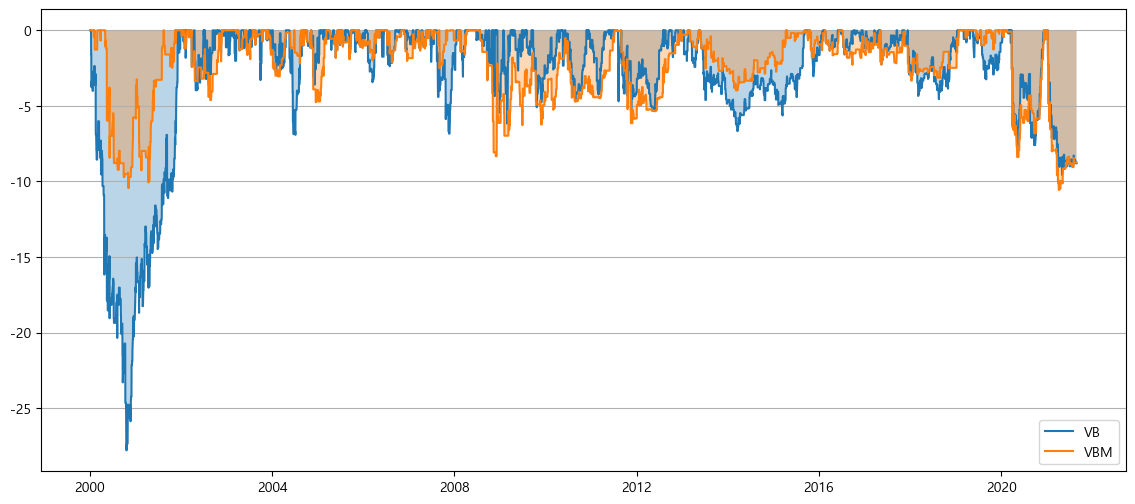

In [111]:
plt.rc('axes', unicode_minus = False) # 음수 깨짐 방지

plt.figure(figsize=(14,6))
plt.grid(True, axis = 'y')
plt.plot(-df['DD'], label = 'VB') # 음수 붙여서 그래프
plt.fill_between(df.index, -df['DD'], alpha = .3)
plt.plot(-df['DD2'], label = 'VBM')
plt.fill_between(df.index, -df['DD2'], alpha = .3)
plt.legend()
plt.show()


In [110]:
# 이동평균선을 매매신호로 포함시키냐 마냐의 차이. 
# MDD2 : 이동평균선을 매매신호로 포함시켰을 때 낙폭 -> 낙폭의 절댓값크기가 작아졌음 ->  Low Risk -> 그만큼 Low Return

print('MDD : ', df['DD'].max())
print('MDD2 : ', df['DD2'].max()) 

MDD :  27.779726849588627
MDD2 :  10.556892232762005
